In [534]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
import nltk

In [535]:
sms=pd.read_csv('spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [536]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns = {"v1" : "label", "v2" : "text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [537]:
print( "number of rows" , len(sms))


number of rows 5572


In [538]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [539]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [540]:
sms['length'] = sms['text'].apply(len)
sms.loc[:,'label']=sms.label.map({'ham':0,'spam' :1})
sms.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

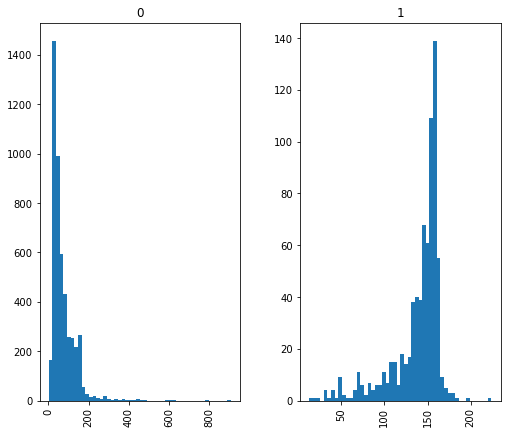

In [541]:
sms.hist(column = 'length',by = 'label', bins = 50, figsize= (8,7))

In [542]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 

count=CountVectorizer()
text = count.fit_transform(sms['text'])

x_train,x_test, y_train,y_test = train_test_split(text,sms['label'],test_size=0.2,random_state=1)
text

print(x_train.shape)
print(x_test.shape)


(4457, 8672)
(1115, 8672)


In [543]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB( )
model.fit(x_train,y_train)

MultinomialNB()

In [544]:
prediction = model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [545]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print("MultinomialNB")
print("Accuracy score: {}".format(accuracy_score(y_test,prediction)))
print("Precision score: {}".format(precision_score(y_test,prediction)))
print("Recall score: {}".format(recall_score(y_test,prediction)))
print("F1 score: {}".format(f1_score(y_test,prediction)))

MultinomialNB
Accuracy score: 0.97847533632287
Precision score: 0.891156462585034
Recall score: 0.9424460431654677
F1 score: 0.9160839160839161


In [546]:
data=sms['text']
input="Customer service annoncement. You have a New Years delivery waiting for you. Please call 07046744435 now to arrange delivery,,,"
data.loc[len(data.index)]=input


In [547]:

text = count.fit_transform(data)
input = text[5572]
model.predict(input)

array([1], dtype=int64)